In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
import skimage as ski

In [2]:
def count_colonies(image_filename):
    bacteria_image = iio.imread(image_filename)
    gray_bacteria = ski.color.rgb2gray(bacteria_image)
    blurred_image = ski.filters.gaussian(gray_bacteria, sigma=1.0)
    mask = blurred_image < 0.2
    labeled_image, count = ski.measure.label(mask, return_num=True)
    print(f"There are {count} colonies in {image_filename}")

    colored_label_image = ski.color.label2rgb(labeled_image, bg_label=0)
    summary_image = ski.color.gray2rgb(gray_bacteria)
    summary_image[mask] = colored_label_image[mask]
    fig, ax = plt.subplots()
    plt.imshow(summary_image)

There are 11 colonies in data/colonies-01.tif
There are 74 colonies in data/colonies-02.tif
There are 333 colonies in data/colonies-03.tif


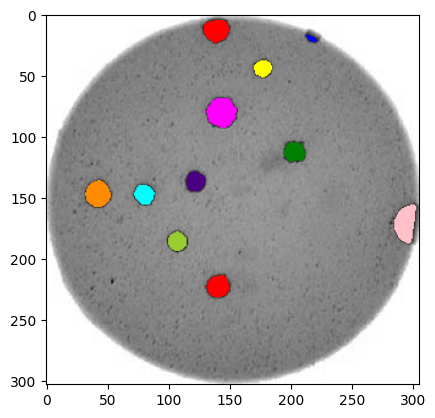

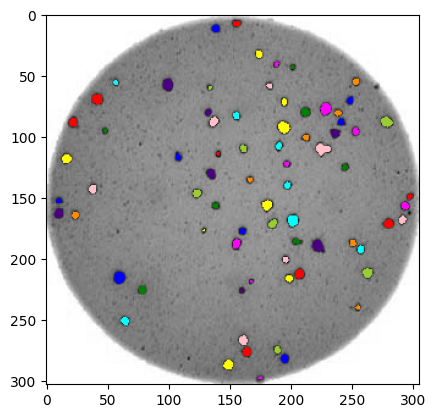

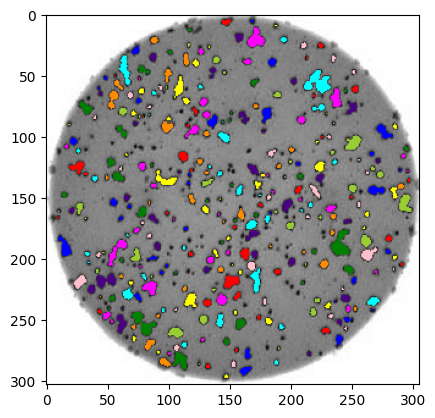

In [3]:
for image_filename in ["data/colonies-01.tif", "data/colonies-02.tif", "data/colonies-03.tif"]:
    count_colonies(image_filename=image_filename)

In [4]:
def count_colonies_enhanced(image_filename, sigma=1.0, min_colony_size=10, connectivity=2):
    
    bacteria_image = iio.imread(image_filename)
    gray_bacteria = ski.color.rgb2gray(bacteria_image)
    blurred_image = ski.filters.gaussian(gray_bacteria, sigma=sigma)
    
    # create mask excluding the very bright pixels outside the dish
    # we dont want to include these when calculating the automated threshold
    mask = blurred_image < 0.80
    # calculate an automated threshold value within the dish using the Otsu method
    t = ski.filters.threshold_otsu(blurred_image[mask])
    # update mask to select pixels both within the dish and less than t
    mask = np.logical_and(mask, blurred_image < t)
    # remove objects smaller than specified area
    mask = ski.morphology.remove_small_objects(mask, min_size=min_colony_size)
    
    labeled_image, count = ski.measure.label(mask, return_num=True)
    print(f"There are {count} colonies in {image_filename}")
    colored_label_image = ski.color.label2rgb(labeled_image, bg_label=0)
    summary_image = ski.color.gray2rgb(gray_bacteria)
    summary_image[mask] = colored_label_image[mask]
    fig, ax = plt.subplots()
    plt.imshow(summary_image)

There are 11 colonies in data/colonies-01.tif
There are 66 colonies in data/colonies-02.tif
There are 267 colonies in data/colonies-03.tif


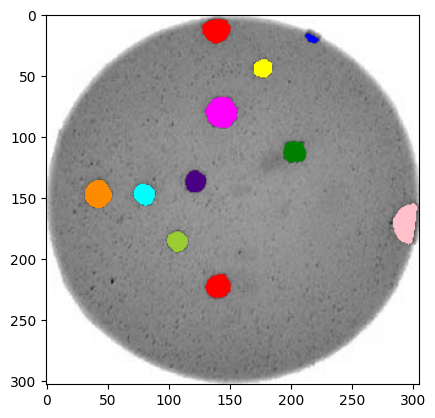

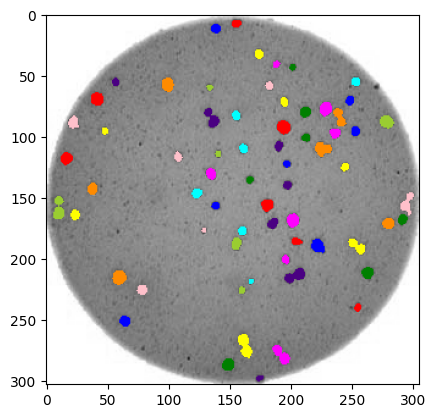

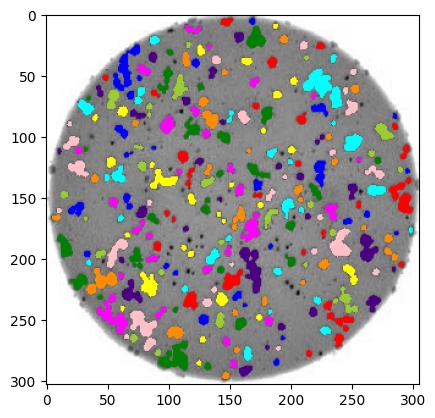

In [5]:
for image_filename in ["data/colonies-01.tif", "data/colonies-02.tif", "data/colonies-03.tif"]:
    count_colonies_enhanced(image_filename=image_filename, min_colony_size=10)

In [6]:
import skimage.viewer

def filter_function(image, sigma, threshold):
    masked = image.copy()
    masked[ski.filters.gaussian(image, sigma=sigma) <= threshold] = 0
    return masked


smooth_threshold_plugin = ski.viewer.plugins.Plugin(
    image_filter=filter_function
)

smooth_threshold_plugin.name = "Smooth and Threshold Plugin"

smooth_threshold_plugin += ski.viewer.widgets.Slider(
    "sigma", low=0.0, high=7.0, value=1.0
)
smooth_threshold_plugin += ski.viewer.widgets.Slider(
    "threshold", low=0.0, high=1.0, value=0.5
)

image = iio.imread(uri=filename, mode="L")

viewer = ski.viewer.ImageViewer(image=image)
viewer += smooth_threshold_plugin
viewer.show()

ModuleNotFoundError: No module named 'skimage.viewer'